In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Assignment/Velocity/Monte-carlo-dropout-assignment/Data/images.zip -d /content/data/
!mv /content/data/content/data/Images /content/
!rm -rf /content/data

Archive:  /content/drive/MyDrive/Assignment/Velocity/Monte-carlo-dropout-assignment/Data/images.zip
   creating: /content/data/content/data/Images/
   creating: /content/data/content/data/Images/CONTROL/
  inflating: /content/data/content/data/Images/CONTROL/output-frame013-slice018.jpg  
  inflating: /content/data/content/data/Images/CONTROL/output-frame000-slice035.jpg  
  inflating: /content/data/content/data/Images/CONTROL/output-frame010-slice038.jpg  
  inflating: /content/data/content/data/Images/CONTROL/output-frame008-slice032.jpg  
  inflating: /content/data/content/data/Images/CONTROL/output-slice124.jpg  
  inflating: /content/data/content/data/Images/CONTROL/output-frame006-slice025.jpg  
  inflating: /content/data/content/data/Images/CONTROL/output-frame003-slice002.jpg  
  inflating: /content/data/content/data/Images/CONTROL/output-frame012-slice032.jpg  
  inflating: /content/data/content/data/Images/CONTROL/output-frame007-slice003.jpg  
  inflating: /content/data/cont

In [1]:
import os
l1 = len(os.listdir('/content/Images/CONTROL'))
l2 = len(os.listdir('/content/Images/SCA2'))

print('No of Images for CONTROL ',l1)
print('No of Images for SCA2 ',l2)

FileNotFoundError: ignored

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
n_images = 5

c1 = np.random.choice(os.listdir('/content/Images/CONTROL'), n_images, replace=False).tolist()
c1 = list(map(lambda x:'/content/Images/CONTROL/'+x,c1))
c2 = np.random.choice(os.listdir('/content/Images/SCA2'), n_images, replace=False).tolist()
c2 = list(map(lambda x:'/content/Images/SCA2/'+x,c2))

d = {}
d['CONTROL'] = c1
d['SCA2'] = c2


Sample images of class :  CONTROL


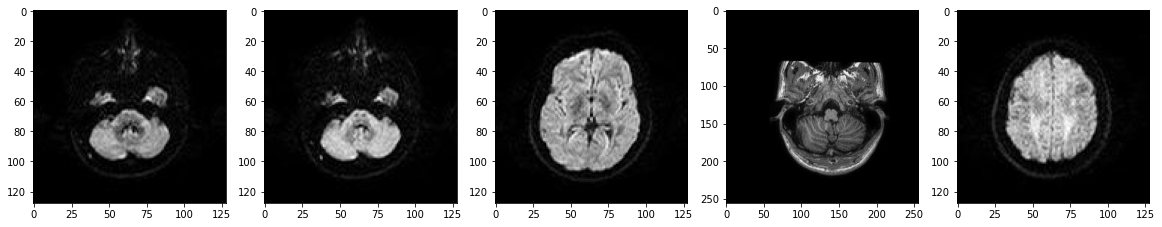


Sample images of class :  SCA2


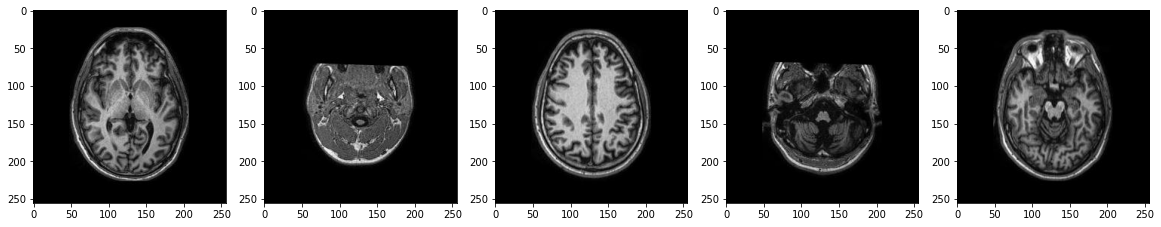

In [ ]:
for i in ['CONTROL','SCA2']:
    print('\nSample images of class : ',i)
    images = d[i]
    plt.figure(figsize=(20,5))
    for j in range(len(images)):
        img = mpimg.imread(images[j])
        plt.subplot(1, n_images, j+1)
        plt.imshow(img)
    plt.show()

In [ ]:
import time
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
def preprocess_img(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150), color_mode='grayscale')
    x = tf.keras.preprocessing.image.img_to_array(img)
    return np.array(x).ravel()

In [ ]:
control_class = os.listdir('/content/Images/CONTROL')
control_class = list(map(lambda x:'/content/Images/CONTROL/'+x, control_class))
sca2_class = os.listdir('/content/Images/SCA2')
sca2_class = list(map(lambda x:'/content/Images/SCA2/'+x, sca2_class))

In [ ]:
img_arr = preprocess_img(control_class[0])
img_arr.shape

(22500,)

In [ ]:
150*150

22500

In [ ]:
from tqdm.auto import tqdm
data = []
for i in tqdm(control_class):
    t = [i]
    arr = preprocess_img(i)
    t.extend(arr.ravel().tolist())
    t.append('CONTROL')
    data.append(t)

for i in tqdm(sca2_class):
    t = [i]
    arr = preprocess_img(i)
    t.extend(arr.ravel().tolist())
    t.append('SCA2')
    data.append(t)

  0%|          | 0/960 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [ ]:
emb_col = list(map(lambda x:'emb_'+str(x+1),range(150*150)))
col_names = ['IMG_path'] + emb_col + ['Class']

import pandas as pd
df = pd.DataFrame(data = data,columns = col_names)

In [ ]:
df.head()

,IMG_path,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_22492,emb_22493,emb_22494,emb_22495,emb_22496,emb_22497,emb_22498,emb_22499,emb_22500,Class
0,/content/Images/CONTROL/output-frame010-slice0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONTROL
1,/content/Images/CONTROL/output-frame013-slice0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONTROL
2,/content/Images/CONTROL/output-frame007-slice0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONTROL
3,/content/Images/CONTROL/output-frame014-slice0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONTROL
4,/content/Images/CONTROL/output-frame007-slice0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONTROL


In [ ]:
df.shape

(1120, 22502)

In [ ]:
df.Class.value_counts()

CONTROL    960
SCA2       160
Name: Class, dtype: int64

In [ ]:
X = df.loc[:,emb_col]
y = df[['Class']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , stratify=y, random_state=101)

In [ ]:
X_train.shape,X_test.shape

((896, 22500), (224, 22500))

In [ ]:
y_train.shape,y_test.shape

((896, 1), (224, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
label = y_train['Class'].unique().tolist()

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt

**Decision Tree Classifier**

Results for Decision Tree classifier:-

********************************************************************************

Training time(sec) =  1.9197123050689697
Prediction time(sec) =  0.0174710750579834


********************************************************************************

Training score =  1.0
Tesing score =  0.9609375


********************************************************************************


No of missclassified for class CONTROL (test data) = 3 
No of missclassified for class SCA2 (test data) = 2 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  5
Total % of missclassified points (test data) =  2.232142857142857


********************************************************************************


Confusion matrix:


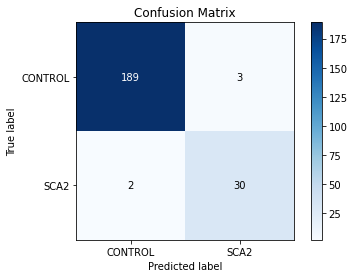



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

     CONTROL       0.99      0.98      0.99       192
        SCA2       0.91      0.94      0.92        32

    accuracy                           0.98       224
   macro avg       0.95      0.96      0.96       224
weighted avg       0.98      0.98      0.98       224



********************************************************************************


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',          #or 'entropy'
                             splitter='best',           #or 'random'
                             max_depth=None,            #or 10,15,20
                             max_features=None,         #or 0.5,0.6,0.7,0.8
                             class_weight='balanced') 

print('Results for Decision Tree classifier:-\n')
start_time = time.time()
dtc.fit(X_train,y_train)
dtc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',dtc_time)

y_pred1 = dtc.predict(X_train)

start_time = time.time()
y_pred = dtc.predict(X_test)
dtc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dtc_time2)

try:
    y_pred_prob1 = dtc.predict_proba(X_train)
    y_pred_prob = dtc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_dtc = confusion_matrix(y_test, y_pred)
dtc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_dtc = balanced_accuracy_score(y_train,y_pred1)
acc2_dtc = balanced_accuracy_score(y_test,y_pred)
# loss1_dtc = log_loss(y_train,y_pred_prob1)
# loss2_dtc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_dtc)
print('Tesing score = ',acc2_dtc)
print('\n')
print('*'*80)  

# print('\nTraining log_loss = ',loss1_dtc)
# print('Tesing log_loss = ',loss2_dtc)
# print('\n')
# print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.values.ravel()))):
    err = np.sum(cm_dtc[i])-cm_dtc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',dtc_miss)
print('Total % of missclassified points (test data) = ',(dtc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

DTC = [acc1_dtc, acc2_dtc, dtc_miss, dtc_miss/len(y_test), dtc_time, dtc_time2]

**monte-carlo-dropout-ensemble**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1])))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def binary_balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()

  y_true = y_true.ravel()
  y_pred = np.round(y_pred.ravel())
  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.binary_crossentropy , #tf.keras.losses.categorical_crossentropy
              metrics = binary_balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.BinaryAccuracy()

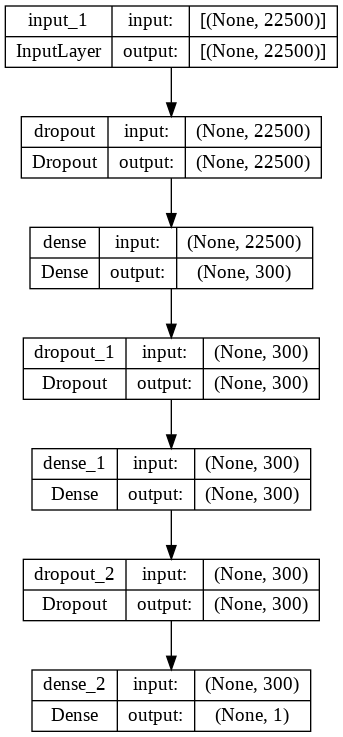

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
batch_size = 32
steps_per_epoch = len(X_train) // batch_size
validation_batch_size = 32
validation_steps = len(X_test) // validation_batch_size

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train['Class'].values)
y_test = encoder.transform(y_test['Class'].values)
encoder.classes_

array(['CONTROL', 'SCA2'], dtype=object)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_balanced_accuracy', min_delta=0, patience=5,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
import time
print('Results for Monte Cralo Dropout Classifier:-\n')
start_time = time.time()

result1 = model.fit(X_train, y_train, 
                   validation_data = (X_test, y_test), 
                   callbacks=[callback],
                   epochs = 10,
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps
                   )

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for Monte Cralo Dropout Classifier:-

Epoch 1/10
28/28 [==============================] - 8s 145ms/step - loss: 0.2295 - binary_balanced_accuracy: 0.9181 - val_loss: 0.4633 - val_binary_balanced_accuracy: 0.9507
Epoch 2/10
28/28 [==============================] - 12s 429ms/step - loss: 0.1163 - binary_balanced_accuracy: 0.9730 - val_loss: 0.3126 - val_binary_balanced_accuracy: 0.9755
Epoch 3/10
28/28 [==============================] - 13s 454ms/step - loss: 0.0977 - binary_balanced_accuracy: 0.9737 - val_loss: 0.1715 - val_binary_balanced_accuracy: 0.9755
Epoch 4/10
28/28 [==============================] - 9s 329ms/step - loss: 0.1780 - binary_balanced_accuracy: 0.9762 - val_loss: 0.2494 - val_binary_balanced_accuracy: 0.9650
Epoch 5/10
28/28 [==============================] - 4s 135ms/step - loss: 0.0332 - binary_balanced_accuracy: 0.9972 - val_loss: 0.2665 - val_binary_balanced_accuracy: 0.9755
Epoch 6/10
28/28 [==============================] - 4s 128ms/step - loss: 2.1541e-

In [ ]:
def predict_proba(X, model, num_samples):
    preds = [model(X, training=True) for _ in range(num_samples)]
    return np.stack(preds).mean(axis=0)
     
def predict_class(X, model, num_samples):
    proba_preds = predict_proba(X, model, num_samples)
    return np.round(proba_preds.ravel())

Prediction time(sec) =  19.74506711959839


Training score =  0.9921875
Tesing score =  0.96875


No of missclassified for class CONTROL (test data) = 0 
No of missclassified for class SCA2 (test data) = 2 
Total no of missclassified points(test data) =  2
Total % of missclassified points(test data) =  0.008928571428571428


Confusion matrix:


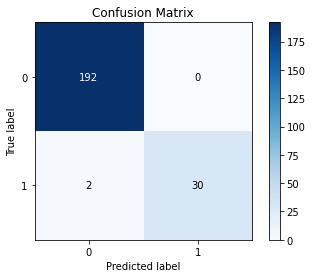



Classification report:-

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       192
           1       1.00      0.94      0.97        32

    accuracy                           0.99       224
   macro avg       0.99      0.97      0.98       224
weighted avg       0.99      0.99      0.99       224

**************************************************************************


In [ ]:
y_pred1 = predict_class(X_train, model, 100)

start_time = time.time()
y_pred = predict_class(X_test, model, 100)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)

# y_pred = np.round(y_pred).flatten()

# y_pred_prob1 = np.concatenate(((1- model.predict(X_train)).T, model.predict(X_train).T),axis=0).T
# y_pred_prob = np.concatenate(((1- model.predict(X_test)).T, model.predict(X_test).T),axis=0).T

cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)
# loss1_model = log_loss(y_train,y_pred_prob1)
# loss2_model = log_loss(y_test,y_pred_prob)


print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

for i in range(len(np.unique(y_train))):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))
# print('\n\nTraining log_loss = ',loss1_model)
# print('Tesing log_loss = ',loss2_model)

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

MCDE = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

**monte-carlo-dropout-ensemble-dt**

In [ ]:
def predict_proba(X, model, num_samples):
    preds = [model(X, training=True) for _ in range(num_samples)]
    return preds

train_data = predict_proba(X_train, model, 100)
train_data = list(map(lambda x:np.array(x).ravel().tolist(),train_data))
X_train = np.array(train_data).T
test_data = predict_proba(X_test, model, 100)
test_data = list(map(lambda x:np.array(x).ravel().tolist(),test_data))
X_test = np.array(test_data).T

In [ ]:
X_train.shape,X_test.shape

((896, 100), (224, 100))

In [ ]:
y_train.shape,y_test.shape

((896,), (224,))

Results for Decision Tree classifier:-

********************************************************************************

Training time(sec) =  0.006460428237915039
Prediction time(sec) =  0.00032019615173339844


********************************************************************************

Training score =  1.0
Tesing score =  0.9661458333333333


********************************************************************************


No of missclassified for class CONTROL (test data) = 1 
No of missclassified for class SCA2 (test data) = 2 
-----------------------------------------------------------------
Total no of missclassified points (test data) =  3
Total % of missclassified points (test data) =  1.3392857142857142


********************************************************************************


Confusion matrix:


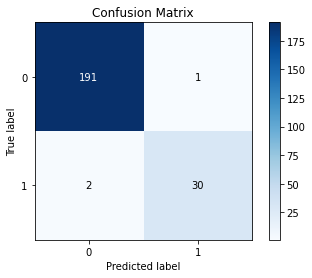



********************************************************************************


Classification report:-

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       192
           1       0.97      0.94      0.95        32

    accuracy                           0.99       224
   macro avg       0.98      0.97      0.97       224
weighted avg       0.99      0.99      0.99       224



********************************************************************************


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',          #or 'entropy'
                             splitter='best',           #or 'random'
                             max_depth=None,            #or 10,15,20
                             max_features=None,         #or 0.5,0.6,0.7,0.8
                             class_weight='balanced') 

print('Results for Decision Tree classifier:-\n')
start_time = time.time()
dtc.fit(X_train,y_train)
dtc_time = (time.time() - start_time)
print('*'*80) 
print('\nTraining time(sec) = ',dtc_time)

y_pred1 = dtc.predict(X_train)

start_time = time.time()
y_pred = dtc.predict(X_test)
dtc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',dtc_time2)

try:
    y_pred_prob1 = dtc.predict_proba(X_train)
    y_pred_prob = dtc.predict_proba(X_test)
except:
    y_pred_prob1 = 'NA'
    y_pred_prob = 'NA'

cm_dtc = confusion_matrix(y_test, y_pred)
dtc_miss = np.sum(y_pred!=y_test.ravel())
acc1_dtc = balanced_accuracy_score(y_train,y_pred1)
acc2_dtc = balanced_accuracy_score(y_test,y_pred)
# loss1_dtc = log_loss(y_train,y_pred_prob1)
# loss2_dtc = log_loss(y_test,y_pred_prob)
print('\n')
print('*'*80) 

print('\nTraining score = ',acc1_dtc)
print('Tesing score = ',acc2_dtc)
print('\n')
print('*'*80)  

# print('\nTraining log_loss = ',loss1_dtc)
# print('Tesing log_loss = ',loss2_dtc)
# print('\n')
# print('*'*80) 

print('\n')
for i in range(len(np.unique(y_train.ravel()))):
    err = np.sum(cm_dtc[i])-cm_dtc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('-'*65)   
print('Total no of missclassified points (test data) = ',dtc_miss)
print('Total % of missclassified points (test data) = ',(dtc_miss/len(y_test))*100)
print('\n')
print('*'*80) 

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n')
print('*'*80) 

print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('\n')
print('*'*80) 

MCDE_DT = [acc1_dtc, acc2_dtc, dtc_miss, dtc_miss/len(y_test), dtc_time, dtc_time2]

In [ ]:
s1 = [DTC,MCDE,MCDE_DT]
s2 = ['DTC','MCDE','MCDE_DT']
col=['Train score','Test score','No of Missclassification','% of Missclasification','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]
    
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})
result2['% of Missclasification'] *= 100

**Final Results**

In [ ]:
#without using cnn output layer
result2

,Classifiers,Train score,Test score,No of Missclassification,% of Missclasification,Training time,Prediction time
0,DTC,1.000000,0.960938,5,2.232143,1.919712,0.017471
1,MCDE,0.992188,0.968750,2,0.892857,52.841371,19.745067
2,MCDE_DT,1.000000,0.966146,3,1.339286,0.006460,0.000320


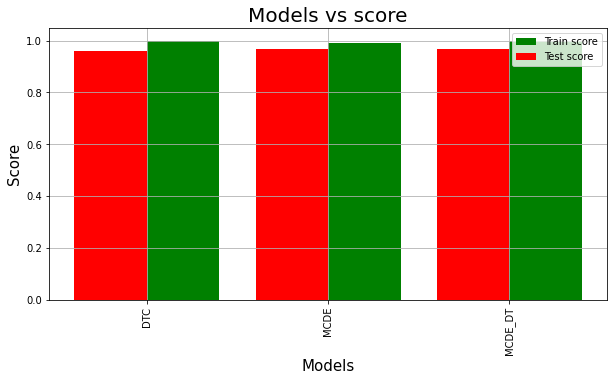

In [ ]:
result = result2
x = np.arange(len(s1))
plt.figure(figsize=(10,5))
plt.bar(x+0.2, result['Train score'], color ='green',width = 0.4)
plt.bar(x-0.2, result['Test score'], color ='red',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.xticks(rotation=90)
plt.legend(['Train score','Test score'])
plt.title('Models vs score', fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid()
plt.show()

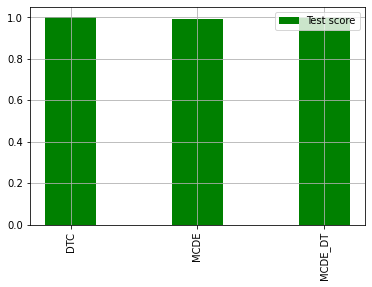

In [ ]:
plt.bar(x, result['Train score'], color ='green',width = 0.4)
plt.xticks(x, result.Classifiers.values.tolist())
plt.legend(['Test score'])
plt.xticks(rotation=90)
plt.grid()
plt.show()